In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
# pip install ultralytics

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# dataset = project.version(1).download("yolov8")

/content/datasets


In [ ]:
# !yolo task=detect \
#       mode=predict \
#       model=yolov8n.pt \
#       conf=0.25 \
#       source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="EuLhRCZuqf3tyvdka2A7")
project = rf.workspace("trash-dataset-for-oriented-bounded-box").project("trash-detection-1fjjc")
version = project.version(14)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash-Detection-14 in yolov8:: 100%|██████████| 13578/13578 [00:02<00:00, 6176.57it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=416 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 245MB/s]
New https://pypi.org/project/ultralytics/8.2.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Trash-Detection-14/data.yaml, epochs=25, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1715675359.2d4506575497.1352.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5625.jpg  weights
P_curve.png					    train_batch5626.jpg
PR_curve.png					    train_batch5627.jpg


/content


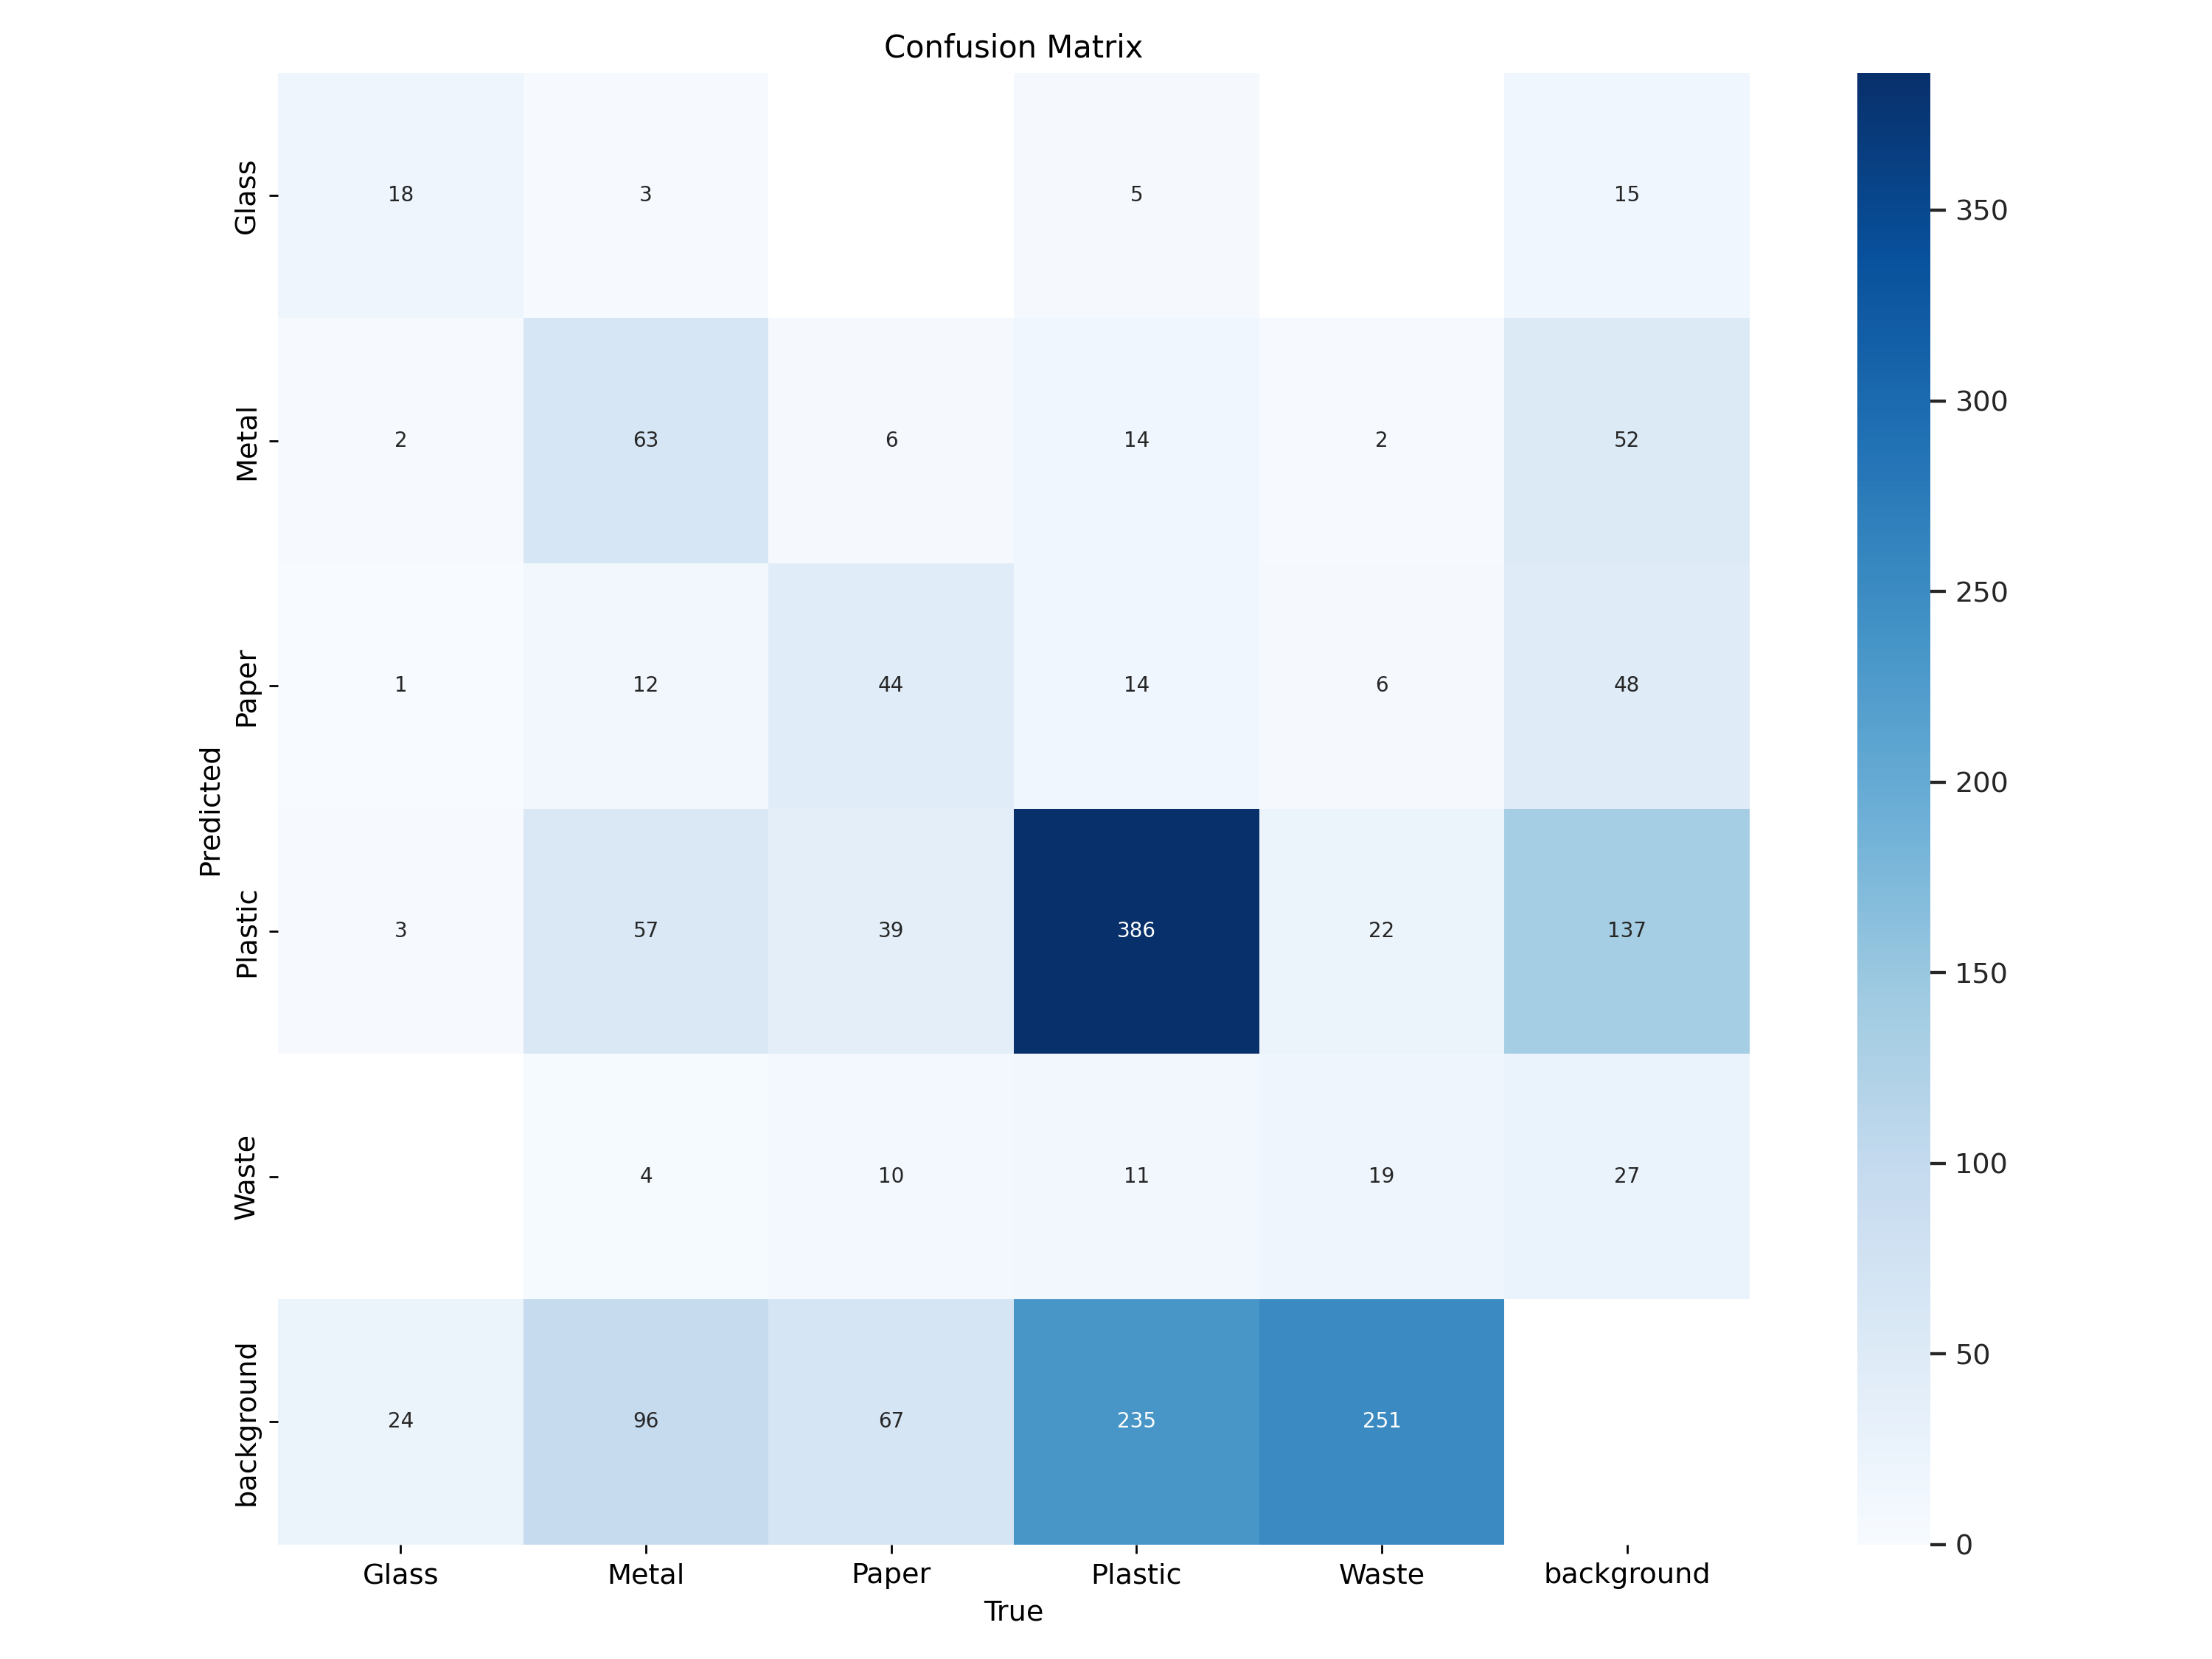

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


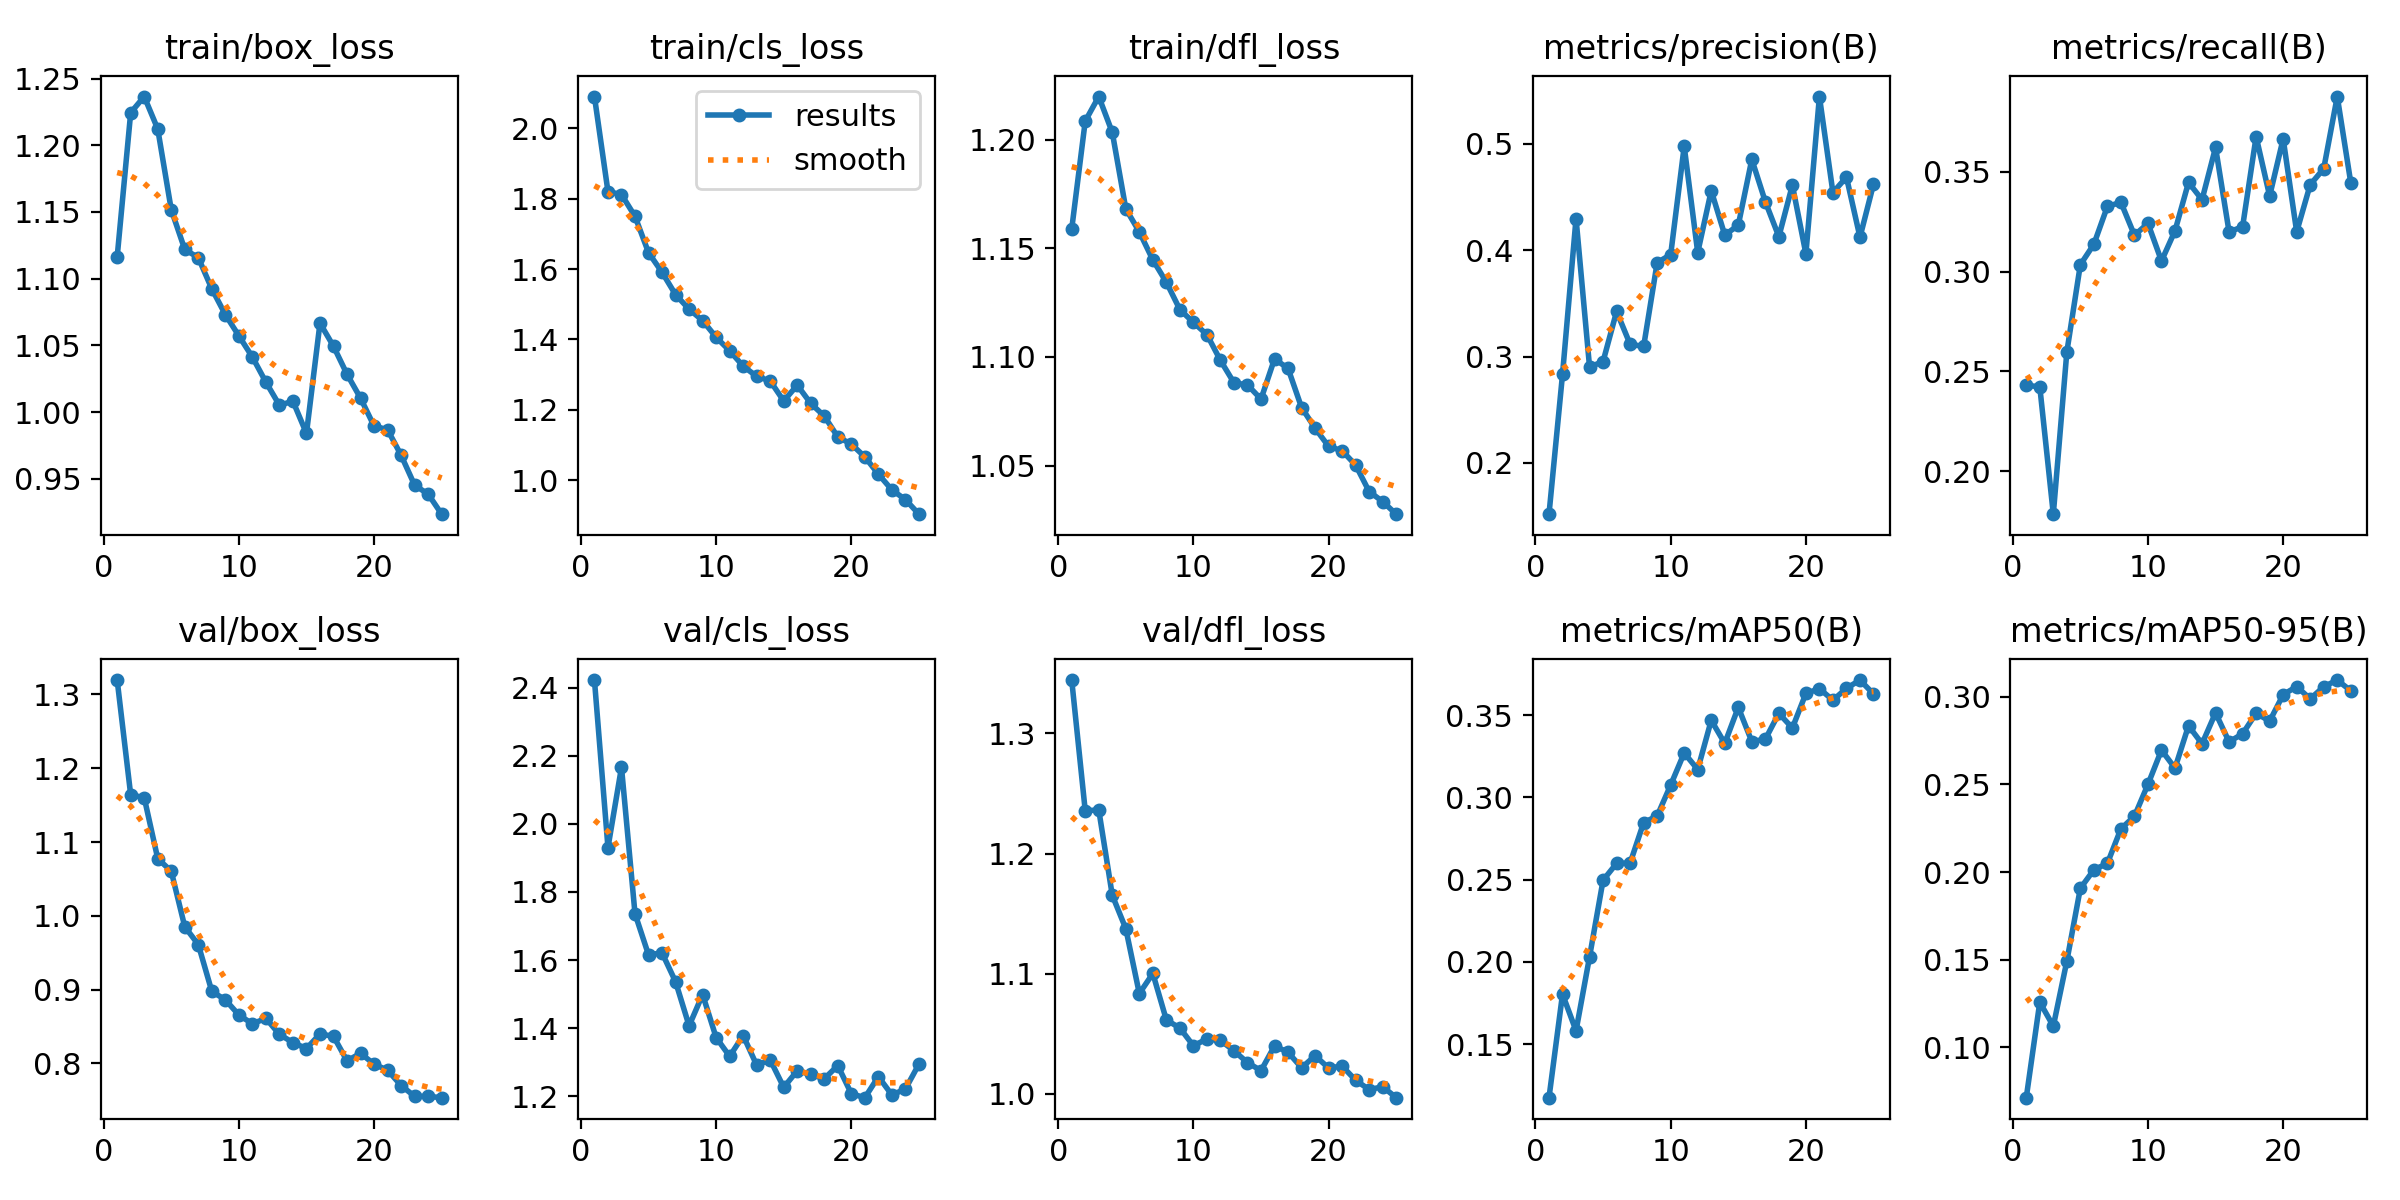

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


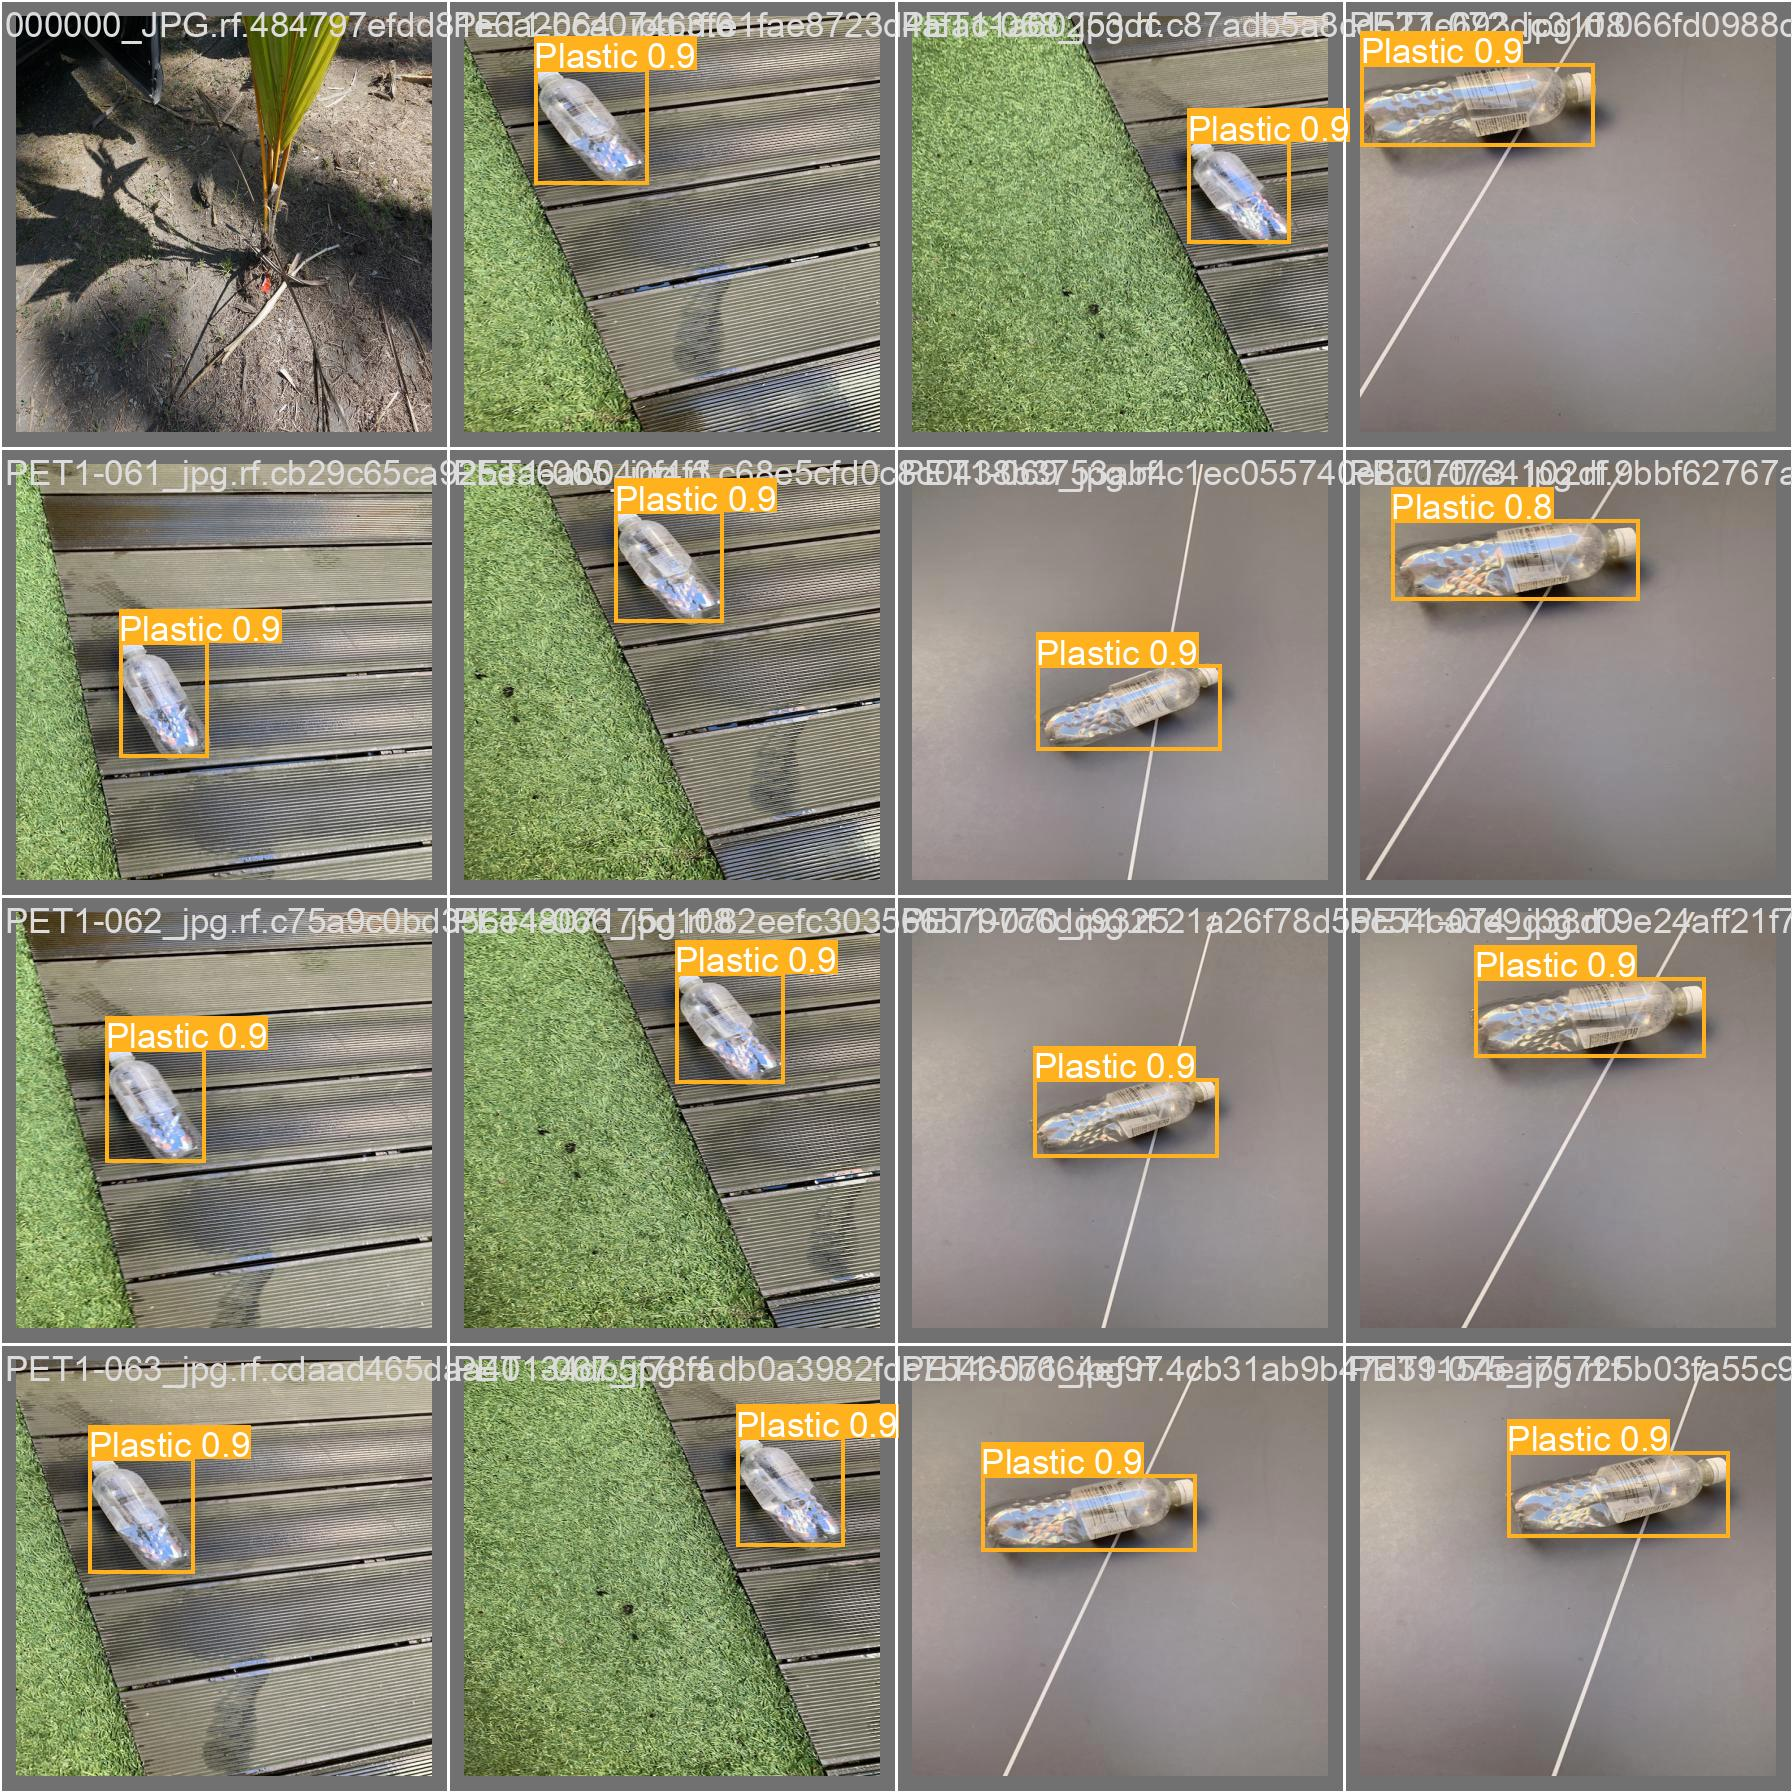

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Trash-Detection-14/valid/labels.cache... 673 images, 0 backgrounds, 0 corrupt: 100% 673/673 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 43/43 [00:07<00:00,  5.84it/s]
                   all        673       1414      0.413      0.388      0.371      0.309
                 Glass        673         48      0.397      0.396      0.369      0.346
                 Metal        673        235       0.53      0.396       0.41      0.354
                 Paper        673        166      0.358 

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/110 /content/datasets/Trash-Detection-14/test/images/000000_jpg.rf.d63f280021dbe6bf447fa7848040a8a4.jpg: 416x416 (no detections), 10.8ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/110 /content/datasets/Trash-Detection-14/test/images/000002_jpg.rf.ebf88c21d1adf9d392211c30b3cf2290.jpg: 416x416 1 Plastic, 10.9ms
image 3/110 /content/datasets/Trash-Detection-14/test/images/000005_jpg.rf.7b950cf9c345d1797663033212ed33b5.jpg: 416x416 1 Plastic, 10.2ms
image 4/110 /content/datasets/Trash-Detection-14/test/images/000006_jpg.rf.167e003e4af6334735516c4b1a106b2f.jpg: 416x416 (no detections), 10.2ms
image 5/110 /content/datasets/Trash-Detection-14/test/images/000007_jpg.rf.55298639ec0a0498f59e450e1ce69eb4.jpg: 416x416 1 Plastic, 10.1ms
image 6/110 /content/datasets/Trash-Detection-14/test/images/000008_jpg.

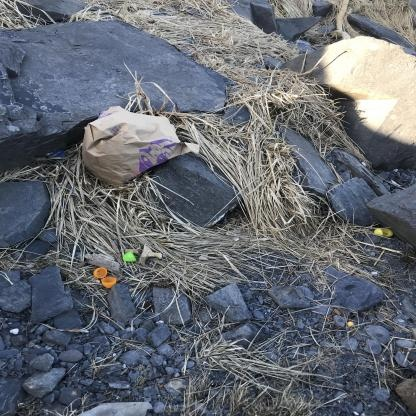

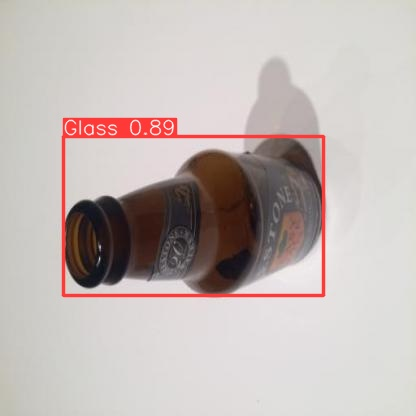

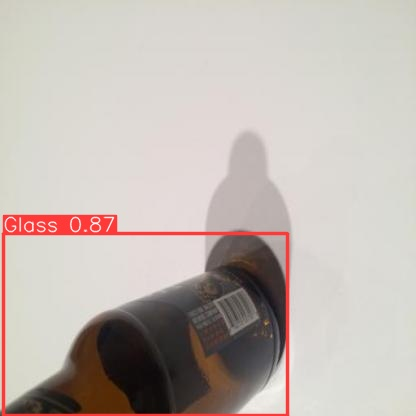

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=416))
      print("\n")

In [ ]:
!zip -r yolov8_predict.zip /content/runs/detect/predict/

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/000010_jpg.rf.9f6d22ee12614374c84aaa329f248256.jpg (deflated 7%)
  adding: content/runs/detect/predict/glass250_jpg.rf.61958ee32072e026a3d9cf965bb8af87.jpg (deflated 9%)
  adding: content/runs/detect/predict/glass256_jpg.rf.2fba4b7d76c231144e0d89f925498030.jpg (deflated 10%)
  adding: content/runs/detect/predict/paper172_jpg.rf.6f0d11fa9a90745bedc2bb4d2a34a645.jpg (deflated 9%)
  adding: content/runs/detect/predict/glass2_jpg.rf.383afdf24ebc0ce507084a79bbadcdb2.jpg (deflated 8%)
  adding: content/runs/detect/predict/glass217_jpg.rf.708c303e3ad5a0cb2fbde5e3b27fd7c9.jpg (deflated 7%)
  adding: content/runs/detect/predict/paper160_jpg.rf.c72adeb10677e7b254f91598eaeb2561.jpg (deflated 9%)
  adding: content/runs/detect/predict/PET1-647_jpg.rf.8ce79ec64f2f9b0c3686bff0ae4d3d26.jpg (deflated 5%)
  adding: content/runs/detect/predict/glass210_jpg.rf.df849748146cde7b89eb9e83a14b9bda.jpg (deflated 12%)
  addi

In [ ]:
from google.colab import files
files.download("/content/yolov8_predict.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !yolo task=detect\
#       mode=train \
#       model=yolov8s.pt \
#       data=/content/Trash-Detection-14/data.yaml\
#       epochs=50 \
#       imgsz=640

In [ ]:
# !yolo task=detect \
#       mode=val \
#       model="/content/runs/detect/train3/weights/best.pt" \
#       data={dataset.location}/data.yaml

In [ ]:
# !yolo task=detect \
#       mode=predict \
#       model="/content/runs/detect/train3/weights/best.pt" \
#       conf=0.25 \
#       source={dataset.location}/test/images

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={dataset.location}/test/images data={dataset.location}/data.yaml save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Trash-Detection-14/test/labels... 110 images, 0 backgrounds, 0 corrupt: 100% 110/110 [00:00<00:00, 1817.89it/s]
val: New cache created: /content/datasets/Trash-Detection-14/test/labels.cache
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:03<00:00,  2.06it/s]
                   all        110        175       0.86      0.399      0.631      0.587
                 Glass        110         60      0.933      0.467      0.713      0.673
                 Metal        110         25      0.923       0.4